<a href="https://colab.research.google.com/github/AshbeeKim/dadaiksunTeamProject/blob/main/ipynb/AshbeeKim/AP_VSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://www.data.go.kr/cmm/cmm/fileDownload.do?atchFileId=FILE_000000002359954&fileDetailSn=1&insertDataPrcus=N

--2021-07-28 15:18:18--  https://www.data.go.kr/cmm/cmm/fileDownload.do?atchFileId=FILE_000000002359954
Resolving www.data.go.kr (www.data.go.kr)... 27.101.215.193
Connecting to www.data.go.kr (www.data.go.kr)|27.101.215.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-msdownload]
Saving to: ‘fileDownload.do?atchFileId=FILE_000000002359954’

fileDownload.do?atc     [          <=>       ]   2.50M  1.02MB/s    in 2.5s    

2021-07-28 15:18:22 (1.02 MB/s) - ‘fileDownload.do?atchFileId=FILE_000000002359954’ saved [2620187]



# init

In [1]:
# 공유폴더 접근
import os
from google.colab import drive  
from os.path import join

# 구글 드라이브 접근
ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

# 구글 개인 폴더 프로젝트 경로
PS_PATH = join(ROOT, "MyDrive/Task/Proj_WeatherGo/AIR")
FINANCE_PATH = join(ROOT, "MyDrive/Task/Proj_WeatherGo/FINANCE")
# 구글 프로젝트 공유 폴더 경로
CW_PATH = join(ROOT, "MyDrive/Proj_WT")

# 데이터_공유 완료
# ORG_PATH = join(CW_PATH, "DataSets/Seoul")
# DATA_PATH = join(CW_PATH, "DataSets/weathergodata")
AIR_PATH = join(CW_PATH, "DataSets/airpolution")

Mounted at /content/drive


In [ ]:
# # # Font install
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [2]:
# Base
import sys
import re
import random
import time
import datetime
from datetime import datetime
import math
import ast
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

import decimal
from decimal import Decimal

if 'ipykernel' in sys.modules:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

# DataFrame
import csv
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.unicode.east_asian_width', True)        # 유니코드 사용 너비 조정
pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_colwidth', 200)

# Statistics Analysis
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt #tsa-? 시계열(trend, seasonl, residual(STL Decoposition))
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.graphics import utils

# Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)
fm._rebuild()
plt.rc("figure", figsize=(15,5))
plt.rc("font", size=16, family='NanumGothic')
import seaborn as sns
from IPython.core.display import display, HTML
from IPython import display
from IPython.display import display as dp
display.Javascript("google.colab.output.setIframeHeight('500px');")
import plotly.express as px


# Web Scraping(Web Crawling)
import json
import requests
from bs4 import BeautifulSoup as BS

import urllib
import urllib.request
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
from urllib.error import HTTPError, URLError

NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo Eco = /usr/s

In [3]:
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.8.3


# 전국 지도

In [ ]:
state_geo = f'{PS_PATH}/Si_Do_map_utf8.json'

state_pop = f'{PS_PATH}/stat_100701.xlsx'
state_data = pd.read_excel(state_pop, index_col=[0])
state_data = state_data.iloc[1:-1, -1]
state_data = state_data.reset_index().rename(columns={'index':'Area', '인구밀도':'pop_density'})
state_data['Area'] = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시','울산광역시', '세종특별자치시', 
                      '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
state_data['pop_density'] = state_data['pop_density'].apply(lambda x: x.replace(',','')).astype('int64')
state_data.to_csv(f'{PS_PATH}/koreapopdensity.csv', index=False, encoding='utf-8')
state_data = pd.read_csv(f'{PS_PATH}/koreapopdensity.csv', encoding='utf-8')

# state_data.head()
# 인구 밀도의 단위 : 명/km^2
# 출처 : 통계청「장래인구추계 시도편 : 2017-2047」, 국토교통부「지적통계」
# state_data.columns = ['CODE', 'POPULATION']
# state_data['CODE'] = state_data.CODE.map(lambda x : str(x).zfill(5))
# state_data.head(1)

# Initialize the map:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
m
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['Area', 'pop_density'],
 key_on='feature.properties.CTP_KOR_NM',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Population Density')

folium.LayerControl().add_to(m)
m 
# # Save to html
# m.save('folium_kr.html')
# webbrowser.open_new("folium_kr.html")

UnicodeDecodeError: ignored

# 서울 지도

In [ ]:
%cd "{PS_PATH}"
# !wget https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json
state_geo = f'{PS_PATH}/seoul_municipalities_geo_simple.json'

import json
from pandas.io.json import json_normalize

# with open(state_geo, 'rb') as fp:
#     corrupted = fp.read()
#     fixed_raw = b", ".join(corrupted.split(b"}{"))
#     fixed = json.loads(str(fixed_raw, "UTF-8"))

# with open(state_geo, 'w') as fp:
#     json.dump(fixed, fp)

json_data=open(state_geo).read()
jsonResult = json.loads(json_data)

/content/drive/.shortcut-targets-by-id/1srYR8TqwFsUSR4BYzQtIBmWUKrEBjd44/Task/Proj_WeatherGo/AIR


In [ ]:
jsonResult

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792330152, 37.55814280369575],
      [127.18350810324185, 37.550053002101485],
      [127.1852644795464, 37.54888592026534],
      [127.18480906237207, 37.545296888806796],
      [12

In [ ]:
# 중앙위치 계산
def center_calc(points_df):
    x = points_df.x
    y = points_df.y

    X = (max(x)+min(x))/2.
    Y = (max(y)+min(y))/2.

    return X, Y

# 다중 Array 구조 이중으로 변환
def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

In [ ]:
center_locations = pd.DataFrame()
codes = []
names = []
x_list = []
y_list = []
for x in range(0, len(jsonResult['features'])):
    code = jsonResult['features'][x]['properties']['code']
    name = jsonResult['features'][x]['properties']['name']
    # 중앙값 생성
    points = jsonResult['features'][x]['geometry']['coordinates'][0]
    points = points_array(points)
    points_df = pd.DataFrame(points)
    points_df.columns = ['x','y']
    X, Y = center_calc(points_df)

    # 결과
    codes.append(code)
    names.append(name)
    x_list.append(X)
    y_list.append(Y)

# 데이터 프레임 생성
center_locations['CODE'] = codes
center_locations['NAME'] = names
center_locations['X'] = x_list
center_locations['Y'] = y_list

In [ ]:
center_locations.sort_values(by='NAME', inplace=True)
center_locations.reset_index(drop=True, inplace=True)

In [ ]:
center_locations

,CODE,NAME,X,Y
0,11230,강남구,127.069193,37.495924
1,11250,강동구,127.148555,37.546035
2,11090,강북구,127.016920,37.644316
3,11160,강서구,126.829426,37.562797
4,11210,관악구,126.946141,37.462668
5,11050,광진구,127.087342,37.545768
6,11170,구로구,126.860063,37.492719
7,11180,금천구,126.903191,37.457396
8,11110,노원구,127.079043,37.652481
9,11100,도봉구,127.034090,37.663539


In [ ]:
poparea_data = pd.read_csv(f'{FINANCE_PATH}/PopAreaSeoul.txt', sep='\t', encoding='utf-8')
for col in poparea_data.columns[-3:]:
  try:
    poparea_data[col] = poparea_data[col].apply(lambda x: x.replace(',','')).astype('int64')
  except:
    pass
poparea_data = poparea_data.iloc[1:,:]
poparea_data = poparea_data.sort_values(by='지역').reset_index(drop=True)

In [ ]:
poparea_data['면적'] = poparea_data['면적'].astype('float64').round(2)

In [ ]:
#2018
air_data = pd.read_csv(f'{FINANCE_PATH}/AirPAvgSeoul2018.csv', encoding='euc-kr')
air_data = air_data.iloc[:, [0, 1,-2]].rename(columns={'측정년도':'YEAR', '측정소명':'NAME', '미세먼지(㎍/㎥)':'PM10'})#.drop(0).reset_index(drop=True)
dist_col = [idx for idx, col in air_data['NAME'].items() if '구' in col]
air_data = air_data.iloc[dist_col, :]
air_data.sort_values(by='NAME', inplace=True)
air_data.reset_index(drop=True, inplace=True)
#2019
air_data2 = pd.read_csv(f'{FINANCE_PATH}/AirPAvgSeoul2019.csv', encoding='euc-kr')
air_data2 = air_data2.iloc[:, [0, 1,-2]].rename(columns={'측정년도':'YEAR', '측정소명':'NAME', '미세먼지(㎍/㎥)':'PM10'})#.drop(0).reset_index(drop=True)
dist_col2 = [idx for idx, col in air_data2['NAME'].items() if '구' in col]
air_data2 = air_data2.iloc[dist_col, :]
air_data2.sort_values(by='NAME', inplace=True)
air_data2.reset_index(drop=True, inplace=True)
#2020
air_data3 = pd.read_csv(f'{FINANCE_PATH}/APAvgInfoSeoul.csv', encoding='euc-kr')
air_data3 = air_data3.iloc[:, [0, 1,-2]].rename(columns={'측정년도':'YEAR', '측정소명':'NAME', '미세먼지(㎍/㎥)':'PM10'})#.drop(0).reset_index(drop=True)
dist_col3 = [idx for idx, col in air_data3['NAME'].items() if '구' in col]
air_data3 = air_data3.iloc[dist_col, :]
air_data3.sort_values(by='NAME', inplace=True)
air_data3.reset_index(drop=True, inplace=True)
#2020
air_data4 = pd.read_csv(f'{FINANCE_PATH}/AirPAvgSeoul2021.csv', encoding='euc-kr')
air_data4 = air_data4.iloc[:, [0, 1,-2]].rename(columns={'측정년도':'YEAR', '측정소명':'NAME', '미세먼지(㎍/㎥)':'PM10'})#.drop(0).reset_index(drop=True)
dist_col4 = [idx for idx, col in air_data['NAME'].items() if '구' in col]
air_data4 = air_data4.iloc[dist_col,:]
air_data4.sort_values(by='NAME', inplace=True)
air_data4.reset_index(drop=True, inplace=True)
# merge 2019-2020
air_data = pd.concat([air_data, air_data2, air_data3, air_data4]).reset_index(drop=True)
# 위치정보와 현황데이터 병합
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
air_data.sort_values(by=['YEAR','NAME'], inplace=True).reset_index(drop=True)
air_data = pd.merge(air_data, center_locations2, how = 'left', on = 'NAME')
air_data = air_data.dropna(axis=0, subset=['X','Y'])#.rename(columns={'Y':'Lat', 'X':'Long'}) # 위치 정보 없는 값 제외

AttributeError: ignored

In [ ]:
print(dp('18"~21" 연도별 미세먼지 자치구 최소치', air_data.groupby(['YEAR']).min().T))
print(dp('18"~21" 연도별 미세먼지 자치구 최대치',air_data.groupby(['YEAR']).max().T))
print(dp('18"~21" 연도별 미세먼지 자치구 평균',air_data.groupby(['YEAR']).mean().T))

'18"~21" 연도별 미세먼지 자치구 최소치'

YEAR,2018,2019,2020,2021
NAME,강남구,강남구,강남구,강남구
PM10,34,39,32,40
CODE,11010,11050,11050,11050
Long,126.829,126.829,126.829,126.829
Lat,37.4574,37.4574,37.4574,37.4574


None


'18"~21" 연도별 미세먼지 자치구 최대치'

YEAR,2018,2019,2020,2021
NAME,중랑구,은평구,은평구,은평구
PM10,48,50,40,48
CODE,11250,11250,11250,11250
Long,127.149,127.149,127.149,127.149
Lat,37.6635,37.6635,37.6635,37.6635


None


'18"~21" 연도별 미세먼지 자치구 평균'

YEAR,2018,2019,2020,2021
PM10,39.800000,43.666667,35.444444,44.666667
Long,126.992743,126.985313,126.985313,126.985313
Lat,37.551768,37.552546,37.552546,37.552546


None


In [ ]:
air_2020 = air_data.iloc[-50:-25,:].copy().reset_index(drop=True)
air_2020

,YEAR,NAME,PM10,CODE,X,Y
0,2019,관악구,50,11210,126.946141,37.462668
1,2019,광진구,43,11050,127.087342,37.545768
2,2019,구로구,45,11170,126.860063,37.492719
3,2019,금천구,39,11180,126.903191,37.457396
4,2019,노원구,42,11110,127.079043,37.652481
5,2019,도봉구,39,11100,127.034090,37.663539
6,2019,동대문구,40,11060,127.052979,37.581896
7,2019,동작구,44,11200,126.946249,37.494893
8,2019,마포구,48,11140,126.912773,37.557380
9,2019,서대문구,42,11130,126.937697,37.578698


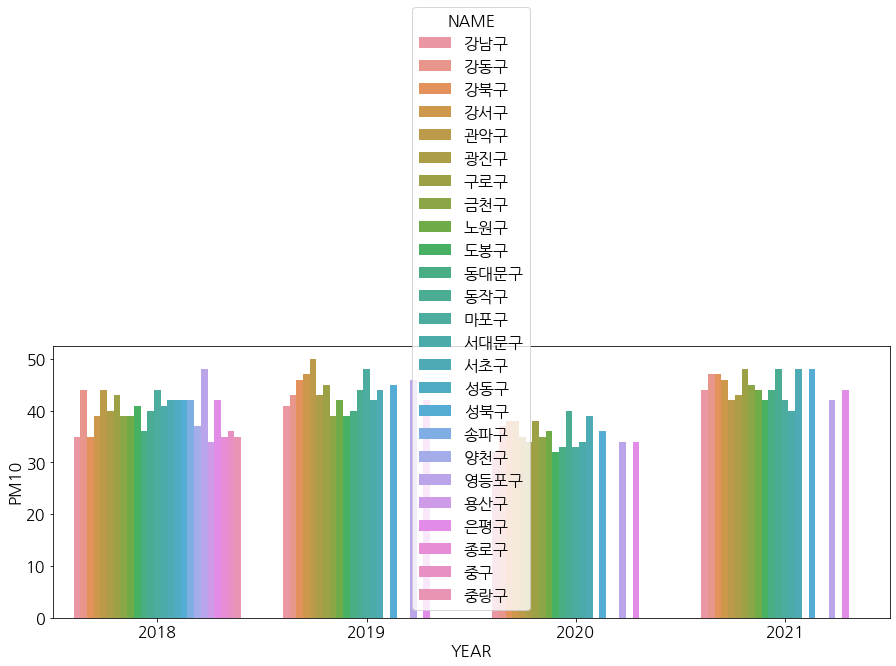

In [ ]:
sns.barplot(data=air_data, x='YEAR', y='PM10', hue='NAME')

In [ ]:
air_data.groupby(['NAME','YEAR']).sum().T

NAME      강남구                                          강동구              \
YEAR        2018        2019        2020        2021        2018        2019   
PM10   35.000000   41.000000   32.000000   44.000000   44.000000   43.000000   
Long  127.069193  127.069193  127.069193  127.069193  127.148555  127.148555   
Lat    37.495924   37.495924   37.495924   37.495924   37.546035   37.546035   

NAME                              강북구                                      \
YEAR        2020        2021        2018        2019        2020        2021   
PM10   37.000000   47.000000   35.000000   46.000000   38.000000   47.000000   
Long  127.148555  127.148555  127.016920  127.016920  127.016920  127.016920   
Lat    37.546035   37.546035   37.644316   37.644316   37.644316   37.644316   

NAME      강서구                                          관악구              \
YEAR        2018        2019        2020        2021        2018        2019   
PM10   39.000000   47.000000   38.000000   46.000000   44.000000   50.000000   
Long  126.829426  126.829426  126.829426  126.829426  126.946141  126.946141   
Lat    37.562797   37.562797   37.562797   37.562797   37.462668   37.462668   

NAME                              광진구                                      \
YEAR        2020        2021        2018        2019        2020        2021   
PM10   35.000000   42.000000   40.000000   43.000000   34.000000   43.000000   
Long  126.946141  126.946141  127.087342  127.087342  127.087342  127.087342   
Lat    37.462668   37.462668   37.545768   37.545768   37.545768   37.545768   

NAME      구로구                                          금천구              \
YEAR        2018        2019        2020        2021        2018        2019   
PM10   43.000000   45.000000   38.000000   48.000000   39.000000   39.000000   
Long  126.860063  126.860063  126.860063  126.860063  126.903191  126.903191   
Lat    37.492719   37.492719   37.492719   37.492719   37.457396   37.457396   

NAME                              노원구                                      \
YEAR        2020        2021        2018        2019        2020        2021   
PM10   35.000000   45.000000   39.000000   42.000000   36.000000   44.000000   
Long  126.903191  126.903191  127.079043  127.079043  127.079043  127.079043   
Lat    37.457396   37.457396   37.652481   37.652481   37.652481   37.652481   

NAME      도봉구                                        동대문구              \
YEAR        2018        2019        2020        2021        2018        2019   
PM10   41.000000   39.000000   32.000000   42.000000   36.000000   40.000000   
Long  127.034090  127.034090  127.034090  127.034090  127.052979  127.052979   
Lat    37.663539   37.663539   37.663539   37.663539   37.581896   37.581896   

NAME                              동작구                                      \
YEAR        2020        2021        2018        2019        2020        2021   
PM10   33.000000   44.000000   40.000000   44.000000   40.000000   48.000000   
Long  127.052979  127.052979  126.946249  126.946249  126.946249  126.946249   
Lat    37.581896   37.581896   37.494893   37.494893   37.494893   37.494893   

NAME      마포구                                        서대문구              \
YEAR        2018        2019        2020        2021        2018        2019   
PM10   44.000000   48.000000   33.000000   42.000000   41.000000   42.000000   
Long  126.912773  126.912773  126.912773  126.912773  126.937697  126.937697   
Lat    37.557380   37.557380   37.557380   37.557380   37.578698   37.578698   

NAME                              서초구                                      \
YEAR        2020        2021        2018        2019        2020        2021   
PM10   34.000000   40.000000   42.000000   44.000000   39.000000   48.000000   
Long  126.937697  126.937697  127.040333  127.040333  127.040333  127.040333   
Lat    37.578698   37.578698   37.475395   37.475395   37.475395   37.475395   

NAME      성동구      성북구               

In [ ]:
# FastMarkerCluster(data=list(zip(target_df['Y'].values, target_df['X'].values)),).add_to(m)
# for index, row in target_df.iterrows():

#     # generate the popup message that is shown on click.
#     popup_text = "{}<br> District : {:}<br> PM10 : {:}"
#     popup_text = popup_text.format(str(index),row["NAME"], str(row["PM10"]))

#     folium.CircleMarker(location=(row["Y"],
#                                   row["X"]),
#                         radius= 10,
#                         color="#007849",
#                         popup=popup_text,
#                         fill=False).add_to(m)
# # folium.LayerControl().add_to(m)

# var circlemarker = L.circleMarker([row.countryInfo.lat, row.countryInfo.long], 
#                                   {color:'red',opacity:0.3,weight:1, fillColor: 'red',fillOpacity:.3, radius: rad})
#                                               .bindPopup(`${row.country}<br>Cases: ${row.cases}<br>Recovered: ${row.recovered}<br>Deaths: ${row.deaths}`)
#                                               .addTo(map);
#                                   });

In [ ]:
from folium.plugins import FastMarkerCluster

air_2020 = air_data.iloc[-50:-25,:].copy().reset_index(drop=True)

# Initialize the map:
m = folium.Map(location=[37.562225, 126.978555], zoom_start=11, tiles='cartodbpositron') # tiles="OpenStreetMap","Mapbox Bright", "cartodbdark_matter"
apavg20 = m.choropleth(geo_data=state_geo,
                       name='2020년 연평균 미세먼지',
                       data=air_2020,
                       columns=['NAME', 'PM10'],
                       key_on='feature.properties.name',
                       fill_color='RdYlGn_r',
                       fill_opacity=0.7,
                       line_opacity=0.5,
                       color = 'white',
                       line_color = 'white',
                       line_weight = 2,
                       # line_color = 'white'
                       legend_name = 'PM<small>10</small>㎍/㎥')


# I can add marker one by one on the map
for i in range(0,len(air_2020)):
    latitude = air_2020.iloc[i]['Y']
    longitude = air_2020.iloc[i]['X']
    location=(latitude, longitude)

    if air_2020.iloc[i]['NAME'] in ['강남구','도봉구'] :
        color = '#91cf60'
    else:
        color = '#ffffbf'
    # popup_text = "{}<br> District : {:}<br> PM10 : {:}"
    popup_text = "{:}<br>{:}"
    popup_text = popup_text.format(air_2020.iloc[i]["NAME"], str(air_2020.iloc[i]["PM10"])+"㎍/㎥")

    # folium.CircleMarker(location=location, radius=10,
    #                     color=color,fill_color=color,fill_opacity = 0.3, opacity=0.7, 
    #                     popup=popup_text).add_to(m)
    folium.CircleMarker(location=location, radius=10,
                        color=color,fill_color=color,fill_opacity = 0.3, opacity=0.7, 
                        popup=popup_text).add_to(m)


# folium.LayerControl(collapsed=False).add_to(m)
folium.LayerControl().add_to(m)
# Save to html
m.save(f'{PS_PATH}/seoul_air.html')
# webbrowser.open_new(f"{PS_PATH}/seoul_air.html")
m

In [ ]:
airpms_data = pd.read_csv(f'{FINANCE_PATH}/AirPollutionMeasuringStation.csv', encoding='utf-8')
airpms_data.rename(columns={'district':'NAME'}, inplace=True)
# airpms_data = air_data.iloc[:, [1,-2]].rename(columns={'측정소명':'NAME', '미세먼지(㎍/㎥)':'PM10'})#.drop(0).reset_index(drop=True)
dist_col = [idx for idx, col in airpms_data['NAME'].items() if '구' in col]
airpms_data = airpms_data.iloc[dist_col, :]
airpms_data.sort_values(by='NAME', inplace=True)
airpms_data.reset_index(drop=True, inplace=True)
airpms_data = pd.merge(airpms_data, air_data, how = 'left', on = 'NAME')
airpms_data

,NAME,pit height(m),latitude,longitude,address,YEAR,PM10,CODE,Long,Lat
0,강남구,16.0,37.504547,126.992308,강남구 학동로 426 (강남구청 별관1동),2018,35,11230,127.069193,37.495924
1,강남구,16.0,37.504547,126.992308,강남구 학동로 426 (강남구청 별관1동),2019,41,11230,127.069193,37.495924
2,강남구,16.0,37.504547,126.992308,강남구 학동로 426 (강남구청 별관1동),2020,32,11230,127.069193,37.495924
3,강남구,16.0,37.504547,126.992308,강남구 학동로 426 (강남구청 별관1동),2021,44,11230,127.069193,37.495924
4,강동구,15.3,37.544989,127.134599,강동구 구천면로 42길 59 (천호1동 주민센터),2018,44,11250,127.148555,37.546035
5,강동구,15.3,37.544989,127.134599,강동구 구천면로 42길 59 (천호1동 주민센터),2019,43,11250,127.148555,37.546035
6,강동구,15.3,37.544989,127.134599,강동구 구천면로 42길 59 (천호1동 주민센터),2020,37,11250,127.148555,37.546035
7,강동구,15.3,37.544989,127.134599,강동구 구천면로 42길 59 (천호1동 주민센터),2021,47,11250,127.148555,37.546035
8,강북구,16.5,37.647891,127.009692,강북구 삼양로139길49(우이동주민센터),2018,35,11090,127.016920,37.644316
9,강북구,16.5,37.647891,127.009692,강북구 삼양로139길49(우이동주민센터),2019,46,11090,127.016920,37.644316


In [ ]:
# Initialize the map:
m = folium.Map(location=[37.562225, 126.978555], zoom_start=11, tiles='cartodbpositron') # tiles="OpenStreetMap",

m.choropleth(
    geo_data=state_geo,
    name='대기측정소 높이',
    data=airpms_data,
    columns=['NAME', 'pit height(m)'],
    key_on='feature.properties.name',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.5,
    color = 'white',
    line_color = 'white',
    line_weight = 2,
    # line_color = 'white'
    legend_name = 'm'
)

# I can add marker one by one on the map
for i in range(0,len(airpms_data)):
    latitude = airpms_data.iloc[i]['latitude']
    longitude = airpms_data.iloc[i]['longitude']
    location=(latitude, longitude)

    if airpms_data.iloc[i]['NAME'] in ['은평구','광진구', '동작구'] :
        color = '#31a354'
    else:
        color = '#e5f5e0'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=airpms_data.iloc[i]['NAME']+"("+str(airpms_data.iloc[i]['pit height(m)'])+"m)"+"\n"+airpms_data.iloc[i]['address']).add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save(f'{PS_PATH}/seoul_airpms.html')
# webbrowser.open_new(f"{PS_PATH}/seoul_airpms.html")
m

In [ ]:
car_data = pd.read_csv(f'{FINANCE_PATH}/carSeoul.txt', sep='\t')
car_data = car_data.iloc[:-1, [1,2,4]].rename(columns=car_data.iloc[0,:]).drop(0).reset_index(drop=True)
for col in car_data.columns[-2:]:
  try:
    car_data[col] = car_data[col].apply(lambda x: x.replace(',','')).astype('int64')
  except:
    pass
car_data['rate'] = pd.Series(car_data['소계'].values/poparea_data['면적'].values).round(0)
car_data.rename(columns={'자치구':'NAME'}, inplace=True)
car_data = car_data.loc[1:,['NAME', 'rate']].reset_index(drop=True)
car_data.sort_values(by='NAME', inplace=True)
car_data.reset_index(drop=True, inplace=True)

In [ ]:
car_data

,NAME,rate
0,강남구,5969.0
1,강동구,6189.0
2,강북구,3203.0
3,강서구,4933.0
4,관악구,4023.0
5,광진구,5779.0
6,구로구,7192.0
7,금천구,6842.0
8,노원구,4310.0
9,도봉구,4628.0


In [ ]:
# 위치정보와 현황데이터 병합
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(car_data, center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y']) # 위치 정보 없는 값 제외

In [ ]:
target_df

,NAME,rate,CODE,X,Y
0,강남구,5969.0,11230,127.069193,37.495924
1,강동구,6189.0,11250,127.148555,37.546035
2,강북구,3203.0,11090,127.016920,37.644316
3,강서구,4933.0,11160,126.829426,37.562797
4,관악구,4023.0,11210,126.946141,37.462668
5,광진구,5779.0,11050,127.087342,37.545768
6,구로구,7192.0,11170,126.860063,37.492719
7,금천구,6842.0,11180,126.903191,37.457396
8,노원구,4310.0,11110,127.079043,37.652481
9,도봉구,4628.0,11100,127.034090,37.663539


In [ ]:
# Initialize the map:
m = folium.Map(location=[37.562225, 126.978555], zoom_start=11, tiles='cartodbpositron') # tiles="OpenStreetMap",

m.choropleth(
    geo_data=state_geo,
    name='2020년 면적당 차량 등록대수',
    data=car_data,
    columns=['NAME', 'rate'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    color = 'white',
    line_color = 'white',
    line_weight = 2,
    # line_color = 'white'
    legend_name = '천 대/㎢'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['종로구','강북구', '용산구', '관악구', '서초구']:
        color = '#2ca25f'
    else:
        color = '#99d8c9'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['rate']/1000,1)))+"천 대").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save(f'{PS_PATH}/seoul_car.html')
# webbrowser.open_new(f"{PS_PATH}/seoul_car.html")
m

* 노인

In [ ]:
len(poparea_data['면적'].values)

25

In [93]:
poparea_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기간         25 non-null     int64  
 1   지역         25 non-null     object 
 2   인구         25 non-null     int64  
 3   면적         25 non-null     float64
 4   인구밀도(명/㎢)  25 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [94]:
eld_data = pd.read_csv(f'{FINANCE_PATH}/elderSeoul.txt', sep='\t')
# print(dp(eld_data))
eld_data = eld_data.rename(columns=eld_data.iloc[0,:]).iloc[3:, [1,2,5]]
for col in eld_data.columns[-2:]:
  try:
    eld_data[col] = eld_data[col].apply(lambda x: x.replace(',','')).astype('int64')
  except:
    pass
# print(dp(eld_data.head()))
eld_data.rename(columns={'지역':'NAME'}, inplace=True)
eld_data.sort_values(by='NAME', inplace=True)
eld_data['area_rate'] = pd.Series(eld_data['합계']/poparea_data['면적']).ceil(0)
eld_data['pop_rate'] = pd.Series(eld_data['합계']/9828094).round(0)  #서울시 전체 인구
# eld_data.rename(columns={'지역':'NAME'}, inplace=True)
eld_data = eld_data.loc[:,['NAME', 'area_rate', 'pop_rate']].reset_index(drop=True)
# eld_data.sort_values(by='NAME', inplace=True)
# eld_data.reset_index(drop=True, inplace=True)

# # 위치정보와 현황데이터 병합
# center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
# target_df = pd.merge(car_data, center_locations2, how = 'left', on = 'NAME')
# target_df = target_df.dropna(axis=0, subset=['X','Y']) # 위치 정보 없는 값 제외

eld_data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-c4b88aa8e81b>", line 12, in <module>
    eld_data['area_rate'] = pd.Series(eld_data['합계']/poparea_data['면적']).ceil(0)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 5141, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'ceil'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/pyt

AttributeError: ignored

In [ ]:
%%javascript
// webbrowser.open_new("seoul_car.html")
// window.open_new_tab("seoul_car.html", '_blank');

from IPython.display import Javascript
def open_web(url):
    display(Javascript('window.open("{url}");'.format(url=url)))
open_web('seoul_car.html')

<IPython.core.display.Javascript object>

In [ ]:
class Map:
    def __init__(self, center, zoom_start):
        self.center = center
        self.zoom_start = zoom_start
    
    def showMap(self):
        #Create the map
        my_map = folium.Map(location = self.center, zoom_start = self.zoom_start)

        #Display the map
        my_map.save("map.html")
        webbrowser.open("map.html")


#Define coordinates of where we want to center our map
coords = [51.5074, 0.1278]
map = Map(center = coords, zoom_start = 13)
map.showMap()



False

# 워드클라우드

# 추세, 주기성, 자치구

## 결측일 정보

* 데이터가 0으로 들어간 날


* 아예 데이터 정보가 없는 날

In [ ]:
missed_date = ['20180217', '20180321', '20180322', '20180323', '20180324', '20180325', '20180326', '20180327', '20180328', '20180329', '20180330',
               '20180331', '20180401', '20180402', '20180403', '20180404', '20180405', '20180406', '20180407', '20180408', '20180420', '20180518',
               '20180519', '20180522', '20180523', '20180524', '20180525', '20180526', '20180529', '20180530', '20180531', '20180603', '20180606',
               '20180607', '20180608', '20180609', '20180610', '20180611', '20180612', '20180613', '20180614', '20180615', '20180616', '20180617',
               '20180618', '20180619', '20180620', '20180621', '20180623', '20180624', '20180625', '20180627', '20180628', '20180629', '20180704',
               '20180705', '20180714', '20180715', '20181117', '20181118', '20190309', '20190310', '20190311', '20190312', '20190313', '20190316',
               '20190317', '20190907', '20190908', '20200222', '20200223']

In [ ]:
MS_DF = pd.DataFrame(pd.Series(missed_date, name='YMD')).astype('datetime64[D]')
MS_DF['YM'] = MS_DF['YMD'].apply(lambda x: x.strftime('%Y%m'))
MS_DF.groupby('YM').count()

,YMD
YM,
201802,1
201803,11
201804,9
201805,10
201806,23
201807,4
201811,2
201903,7
201909,2


In [ ]:
MS_DF[MS_DF['YM']=='201802']

,YMD,YM
0,2018-02-17,201802


In [ ]:
MS_DF[MS_DF['YM']=='201803']

,YMD,YM
1,2018-03-21,201803
2,2018-03-22,201803
3,2018-03-23,201803
4,2018-03-24,201803
5,2018-03-25,201803
6,2018-03-26,201803
7,2018-03-27,201803
8,2018-03-28,201803
9,2018-03-29,201803
10,2018-03-30,201803


In [ ]:
MS_DF[MS_DF['YM']=='201804']

,YMD,YM
12,2018-04-01,201804
13,2018-04-02,201804
14,2018-04-03,201804
15,2018-04-04,201804
16,2018-04-05,201804
17,2018-04-06,201804
18,2018-04-07,201804
19,2018-04-08,201804
20,2018-04-20,201804


In [ ]:
MS_DF[MS_DF['YM']=='201805']

,YMD,YM
21,2018-05-18,201805
22,2018-05-19,201805
23,2018-05-22,201805
24,2018-05-23,201805
25,2018-05-24,201805
26,2018-05-25,201805
27,2018-05-26,201805
28,2018-05-29,201805
29,2018-05-30,201805
30,2018-05-31,201805


In [ ]:
MS_DF[MS_DF['YM']=='201806']

,YMD,YM
31,2018-06-03,201806
32,2018-06-06,201806
33,2018-06-07,201806
34,2018-06-08,201806
35,2018-06-09,201806
36,2018-06-10,201806
37,2018-06-11,201806
38,2018-06-12,201806
39,2018-06-13,201806
40,2018-06-14,201806


In [ ]:
MS_DF[MS_DF['YM']=='201807']

,YMD,YM
54,2018-07-04,201807
55,2018-07-05,201807
56,2018-07-14,201807
57,2018-07-15,201807


In [ ]:
MS_DF[MS_DF['YM']=='201811']

,YMD,YM
58,2018-11-17,201811
59,2018-11-18,201811


In [ ]:
MS_DF[MS_DF['YM']=='201903']

,YMD,YM
60,2019-03-09,201903
61,2019-03-10,201903
62,2019-03-11,201903
63,2019-03-12,201903
64,2019-03-13,201903
65,2019-03-16,201903
66,2019-03-17,201903


In [ ]:
MS_DF[MS_DF['YM']=='201909']

,YMD,YM
67,2019-09-07,201909
68,2019-09-08,201909


## 한국환경공단

https://airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123

In [ ]:
PS_PATH

'/content/drive/MyDrive/Task/Proj_WeatherGo/AIR'

In [ ]:
path = "/content/drive/MyDrive/Task/Proj_WeatherGo/airkorea"
df10 = pd.read_excel(f'{path}/2010q1.xlsx')
# df10 = df10[df10['지역']=='서울'].iloc[[idx for idx, col in enumerate(df10['측정소명'].values) if '구' in col], [1,2,3,-2,-1]]
df10 = df10[df10['지역']=='서울']
df10 = df10.iloc[[idx for idx, col in enumerate(df10['측정소명'].values) if '구' in col], [1,2,3,-2,-1]]
df10.rename(columns={'측정소명':'NAME', '측정소코드':'CODE', '측정일시':'YMDH', '주소':'Address'}, inplace=True)
df10['YMD'] = df10['YMDH'].astype('str').apply(lambda x: x[:8])
# # .reset_index(drop=True)
df10.groupby(['YMD', 'NAME']).mean().head()

CODE          YMDH       PM10
YMD      NAME                                     
20100101 강남구  111261.0  2.010010e+09  36.458333
         강동구  111274.0  2.010010e+09  28.625000
         강북구  111291.0  2.010010e+09  33.000000
         강서구  111212.0  2.010010e+09  33.791667
         관악구  111251.0  2.010010e+09  35.541667

In [ ]:
df10 = df10.groupby(['YMD', 'NAME']).mean().reset_index().head()

In [ ]:
df10

,YMD,NAME,CODE,YMDH,PM10
0,20100101,강남구,111261.0,2.010010e+09,36.458333
1,20100101,강동구,111274.0,2.010010e+09,28.625000
2,20100101,강북구,111291.0,2.010010e+09,33.000000
3,20100101,강서구,111212.0,2.010010e+09,33.791667
4,20100101,관악구,111251.0,2.010010e+09,35.541667


In [ ]:
def quarter_xlsx(df_name, file_name):
  globals()[f'{df_name}'] = pd.read_excel(f'{path}/{file_name}.xlsx')
  globals()[f'{df_name}'] = globals()[f'{df_name}'][globals()[f'{df_name}']['지역']=='서울']
  globals()[f'{df_name}'] = globals()[f'{df_name}'].iloc[[idx for idx, col in enumerate(globals()[f'{df_name}']['측정소명'].values) if '구' in col], [1,2,3,-2,-1]]
  globals()[f'{df_name}'].rename(columns={'측정소명':'NAME', '측정소코드':'CODE', '측정일시':'YMDH', '주소':'Address'}, inplace=True)
  globals()[f'{df_name}']['YMD'] = globals()[f'{df_name}']['YMDH'].astype('str').apply(lambda x: x[:8])
  globals()[f'{df_name}'].groupby(['YMD', 'NAME']).mean().reset_index()

In [ ]:
df10 = ['df10q1','df10q2', 'df10q3', 'df10q4']
file10 = ['2010q1', '2010q2', '2010q3', '2010q4']

for df, fname in zip(df10, file10):
  quarter_xlsx(df, fname)

In [ ]:
df11 = ['df11q1','df11q2', 'df11q3', 'df11q4']
file11 = ['2011q1', '2011q2', '2011q3', '2011q4']

for df, fname in zip(df11, file11):
  quarter_xlsx(df, fname)

In [ ]:
df12 = ['df12q1','df12q2', 'df12q3', 'df12q4']
file12 = ['2012q1', '2012q2', '2012q3', '2012q4']

for df, fname in zip(df12, file12):
  quarter_xlsx(df, fname)

In [ ]:
df13 = ['df13q1','df13q2', 'df13q3', 'df13q4']
file13 = ['2013q1', '2013q2', '2013q3', '2013q4']

for df, fname in zip(df13, file13):
  quarter_xlsx(df, fname)

In [ ]:
df14 = pd.read_csv(f'{path}/2014q1.csv', encoding='euc-kr')

In [ ]:
df14

In [ ]:
df17 = []
df19 = []
df20 = []
file17 = []
file19 = []
file20 = []

for i in range(1, 13):
  df17.append('df17m'+str(i))
  df19.append('df19m'+str(i))
  df20.append('df20m'+str(i))
  file17.append('2017_'+str(i))
  file19.append('2019_'+str(i))
  file20.append('2020_'+str(i))

In [ ]:
df18 = ['df18q1','df18q2', 'df18q3', 'df18q4']
file18 = ['2018q1', '2018q2', '2018q3', '2018q4']

for df, fname in zip(df17, file17):
  quarter_xlsx(df, fname)
for df, fname in zip(df18, file18):
  quarter_xlsx(df, fname)
for df, fname in zip(df19, file19):
  quarter_xlsx(df, fname)
for df, fname in zip(df20, file20):
  quarter_xlsx(df, fname)